# HVSR

## Definición

El método HVSR (Horizontal-Vertical Spectral Ratio) propuesto por Nakamura (1989) se calcula dividiendo el espectro horizontal entre el espectro vertical en función de la frecuencia. Esta relación puede proporcionar información valiosa sobre las propiedades del subsuelo, especialmente en términos de la velocidad de propagación de las ondas superficiales y la respuesta de frecuencia del suelo.

$$
\text{HVSR}(f) = \frac{\text{EspectroHorizontal}(f)}{\text{EspectroVertical}(f)}
$$


## Librerías

### NumPy (numpy)
NumPy es una librería fundamental para la computación científica en Python. Proporciona soporte para arrays multidimensionales y matrices, junto con una amplia colección de funciones matemáticas para operar con estos datos de manera eficiente.

### Matplotlib (matplotlib.pyplot)
Matplotlib es una librería para la generación de gráficos en Python. pyplot es un módulo de Matplotlib que proporciona una interfaz similar a MATLAB para la creación de gráficos de manera sencilla y rápida.

### ObsPy (obspy)
ObsPy es una librería especializada en el procesamiento de datos sismológicos. read es una función de ObsPy que permite leer archivos de datos sismológicos en varios formatos.

### SciPy (scipy)
SciPy es una librería que proporciona funciones adicionales para la computación científica. El módulo signal de SciPy contiene herramientas para el procesamiento de señales, como filtros, transformadas de Fourier, y más.

### Konno-Ohmachi Smoothing
Dentro de ObsPy, la función konno_ohmachi_smoothing se utiliza para suavizar espectros de frecuencias. Este método es comúnmente empleado en sismología para procesar señales y obtener resultados más claros y utilizables.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from obspy import read
from scipy import signal
from obspy.signal.konnoohmachismoothing import konno_ohmachi_smoothing as konno_ohmachi

In [2]:
ruta_z = "C:\\Users\\lenovo.DESKTOP-NGHQ1VP\\OneDrive\\Documentos\\repositorios\\hvsrlearn\\data\\stationA\\A04_staA.z.sac"
ruta_n = "C:\\Users\\lenovo.DESKTOP-NGHQ1VP\\OneDrive\\Documentos\\repositorios\\hvsrlearn\\data\\stationA\\A04_staA.n.sac"
ruta_e = "C:\\Users\\lenovo.DESKTOP-NGHQ1VP\\OneDrive\\Documentos\\repositorios\\hvsrlearn\\data\\stationA\\A04_staA.e.sac"

In [3]:
z = read(ruta_z)
n = read(ruta_n)
e = read(ruta_e)

### .data
Se utiliza para acceder a los valores de la señal presente la señal
### .stats.sampling_rate
Se utiliza para acceder a la frecuencia de muestreo de la señal
### .times("matplotlib")
Se usa para acceder al vector de tiempo en la señal. y usarlo con matplotlib

In [4]:
zdata = z[0].data
zsamplingrate = z[0].stats.sampling_rate
ztimes = z[0].times("matplotlib")

In [5]:
ndata = n[0].data
nsamplingrate = n[0].stats.sampling_rate
ntimes = n[0].times("matplotlib")

In [6]:
edata = e[0].data
esamplingrate = e[0].stats.sampling_rate
etimes = e[0].times("matplotlib")

### Visualización de la señal por componentes

Text(0.5, 0.98, 'Sation A')

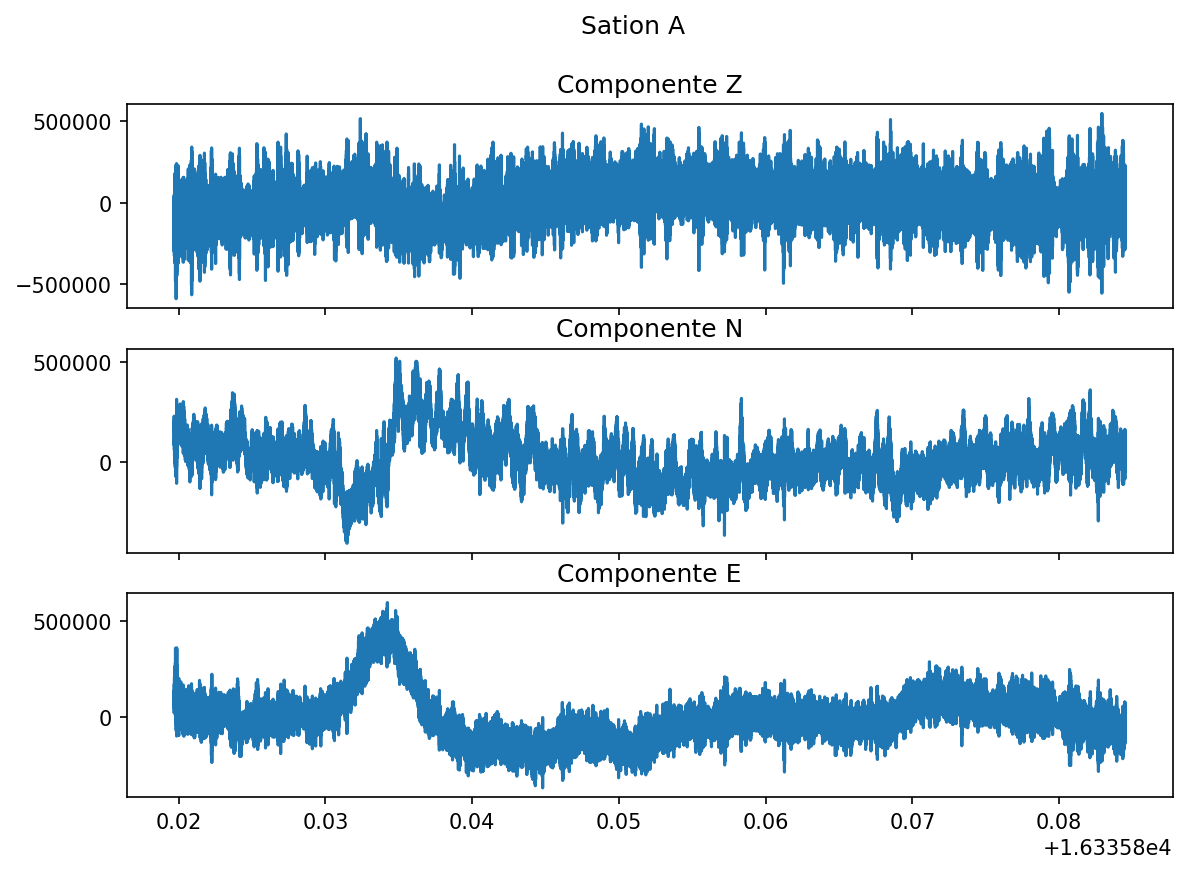

In [7]:
fig, ax = plt.subplots(3,1, figsize = (9,6), dpi = 150, sharex = True)
ax[0].plot(ztimes, zdata)
ax[0].set_title('Componente Z')
ax[1].plot(ntimes, ndata)
ax[1].set_title('Componente N')
ax[2].plot(etimes, edata)
ax[2].set_title('Componente E')

plt.suptitle('Sation A')

### Remover la tendencia de la señal (si es que presenta)

In [8]:
zdtr = signal.detrend(zdata, type='linear')
ndtr = signal.detrend(ndata, type='linear')
edtr = signal.detrend(edata, type='linear')

Text(0.5, 0.98, 'Sation A')

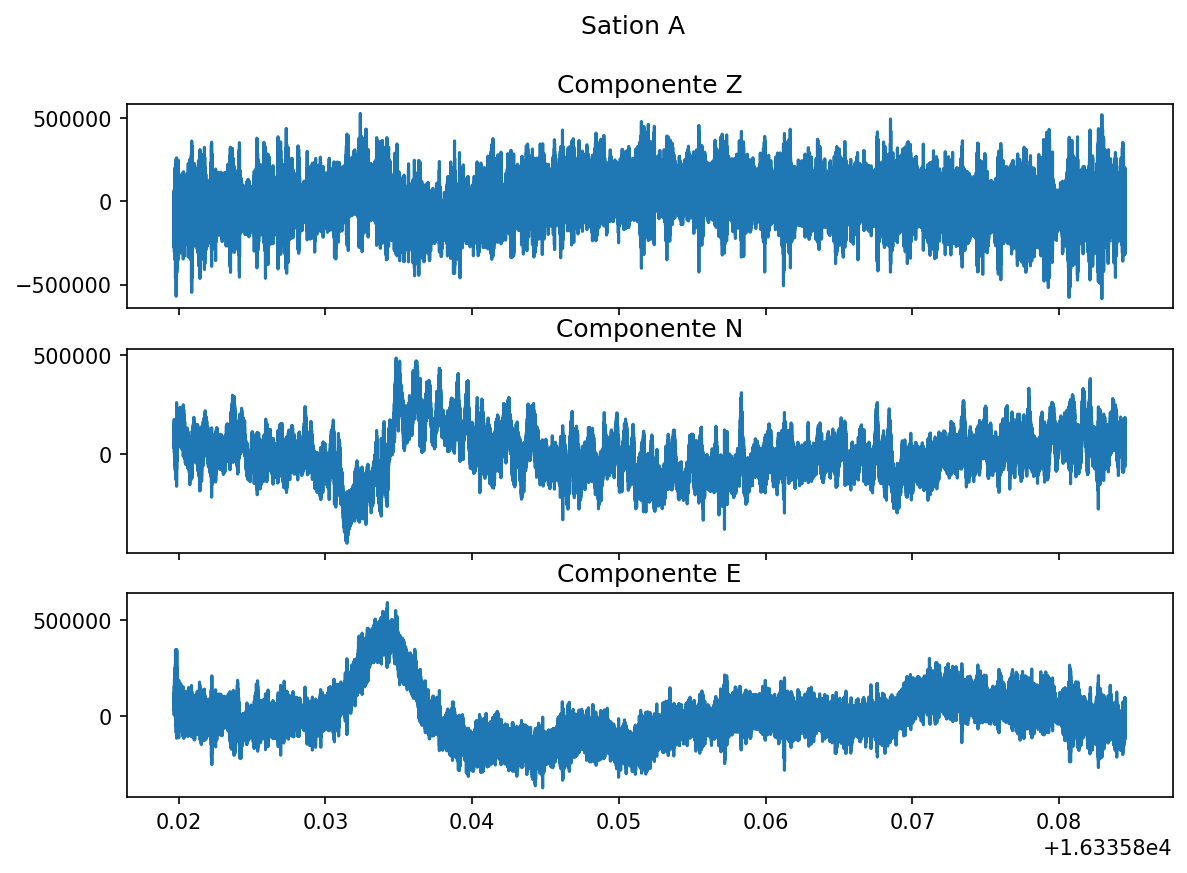

In [9]:
fig, ax = plt.subplots(3,1, figsize = (9,6), dpi = 150, sharex = True)
ax[0].plot(ztimes, zdtr)
ax[0].set_title('Componente Z')
ax[1].plot(ntimes, ndtr)
ax[1].set_title('Componente N')
ax[2].plot(etimes, edtr)
ax[2].set_title('Componente E')

plt.suptitle('Sation A')

### Parámetros de procesamiento

1. **Overlap**: Es el porcentaje de ventana que se traslapa al momento de hacer la transformada de Fourier.
2. **Ancho**: Es el tamaño de la ventana expresado en segundos.
3. **Window**: Es el tipo de ventana que se usa para calcular la transformada de Fourier.
4. **Sm**: Es el sobremuestreo para tener una mejor exactitud en el resultado.
5. **Detr**: Remueve la tendencia de la señal.
6. **Nperseg**: Número de muestras por segundo.
7. **Overlapping**: Es la cantidad de muestras en el overlap.


In [10]:
overlap = 5 #%
ancho = 82.02
window = "hamming"
sm = 10
detr = "linear"
nperseg = ancho*zsamplingrate
overlapping = (overlap / 100) * nperseg

### Función signal.welch

El método de Welch es una técnica para estimar la densidad espectral de potencia (PSD) de una señal. Este método mejora la precisión de la estimación reduciendo la varianza mediante el promediado de múltiples periodogramas. A continuación, se describen los principales pasos y características del método de Welch.

- **Segmentación de la Señal**: La señal original se divide en segmentos solapados. El solapamiento es típicamente del 50%, aunque puede ajustarse según las necesidades específicas.
  
- **Ventaneo de los Segmentos**: Cada segmento se multiplica por una ventana de datos (como una ventana de Hamming o de Hanning) para reducir los efectos de discontinuidades en los bordes de los segmentos. Esta ventana ayuda a minimizar las distorsiones en el espectro de la señal.

- **Cálculo del Periodograma**: Se calcula el periodograma de cada segmento ventaneado, es decir, se obtiene la densidad espectral de potencia para cada segmento mediante la transformada de Fourier.

- **Promediado de los Periodogramas**: Los periodogramas obtenidos de cada segmento se promedian para obtener una estimación final de la densidad espectral de potencia. Este promediado reduce la varianza de la estimación, mejorando su fiabilidad.


In [11]:
f, Pz = signal.welch(zdtr, fs=zsamplingrate, 
                         window=window, 
                         nperseg=nperseg, 
                         noverlap=overlapping,
                         nfft=sm*nperseg,detrend=detr,
                         scaling='spectrum', average='median')
_, Pn = signal.welch(ndtr, fs=zsamplingrate, 
                         window=window, 
                         nperseg=nperseg, 
                         noverlap=overlapping,
                         nfft=sm*nperseg, detrend=detr,
                         scaling='spectrum', average='median')
_, Pe = signal.welch(edtr, fs=zsamplingrate, 
                         window=window, 
                         nperseg=nperseg, detrend=detr,
                         noverlap=overlapping,
                         nfft=sm*nperseg,
                         scaling='spectrum', average='median')

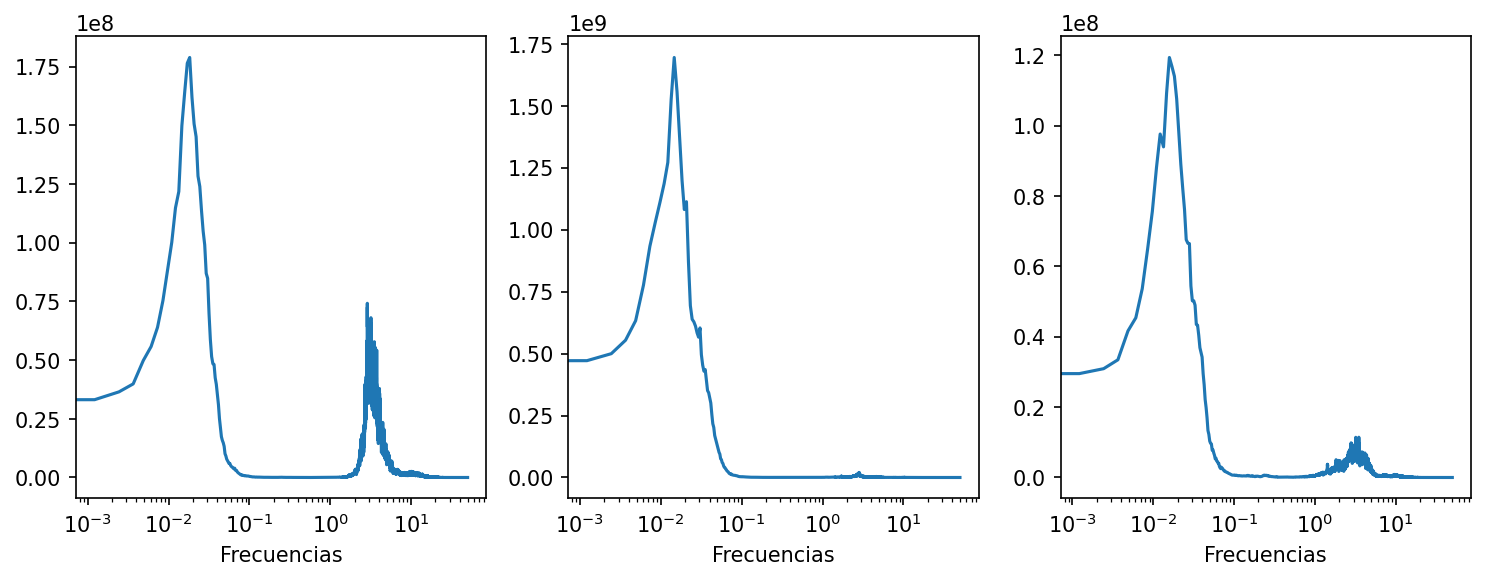

In [12]:
fig, ax = plt.subplots(1,3,figsize = (12,4), dpi = 150)
ax[0].plot(f,Pz)
ax[1].plot(f,Pn)
ax[2].plot(f,Pe)

for i in range(3):
    ax[i].set_xlabel('Frecuencias')
    ax[i].set_xscale('log')

### Suavizamiento Konno-Omachi

El suavizamiento Konno-Omachi es una técnica utilizada en el análisis de espectros de frecuencias, principalmente en sismología y análisis de vibraciones, para suavizar datos espectrales y obtener representaciones más claras y menos ruidosas.

#### Características Principales

1. **Función de Suavizamiento**: Utiliza una función de forma gaussiana para ponderar los valores espectrales según su proximidad en frecuencia, atenuando fluctuaciones rápidas y resultando en una curva más suave.

2. **Control de Ancho de Banda**: El grado de suavidad es controlado por un parámetro que ajusta el ancho de banda de suavizamiento; un valor más alto produce un mayor suavizamiento, mientras que un valor más bajo conserva más detalles del espectro original.

#### Fórmula y Algoritmo

El suavizamiento se realiza mediante la fórmula:

$$
W(f, f_0) = \frac{\sin(B \log_{10}(f/f_0))}{B \log_{10}(f/f_0)}
$$

Aquí, \( f \) es la frecuencia en la que se calcula el peso, \( f_0 \) es la frecuencia central, y \( B \) controla el ancho de banda de la función de suavizamiento.


In [13]:
b = 188.5
ko_Pz = konno_ohmachi(Pz, f, b, normalize=True)
ko_Pn = konno_ohmachi(Pn, f, b, normalize=True)
ko_Pe = konno_ohmachi(Pe, f, b, normalize=True)

C:\Users\lenovo.DESKTOP-NGHQ1VP\anaconda3\Lib\site-packages\obspy\signal\konnoohmachismoothing.py:212: UserWarning: `frequencies` and `spectra` should have the same dtype. It will be changed to np.float64 for both.
  warnings.warn(msg)


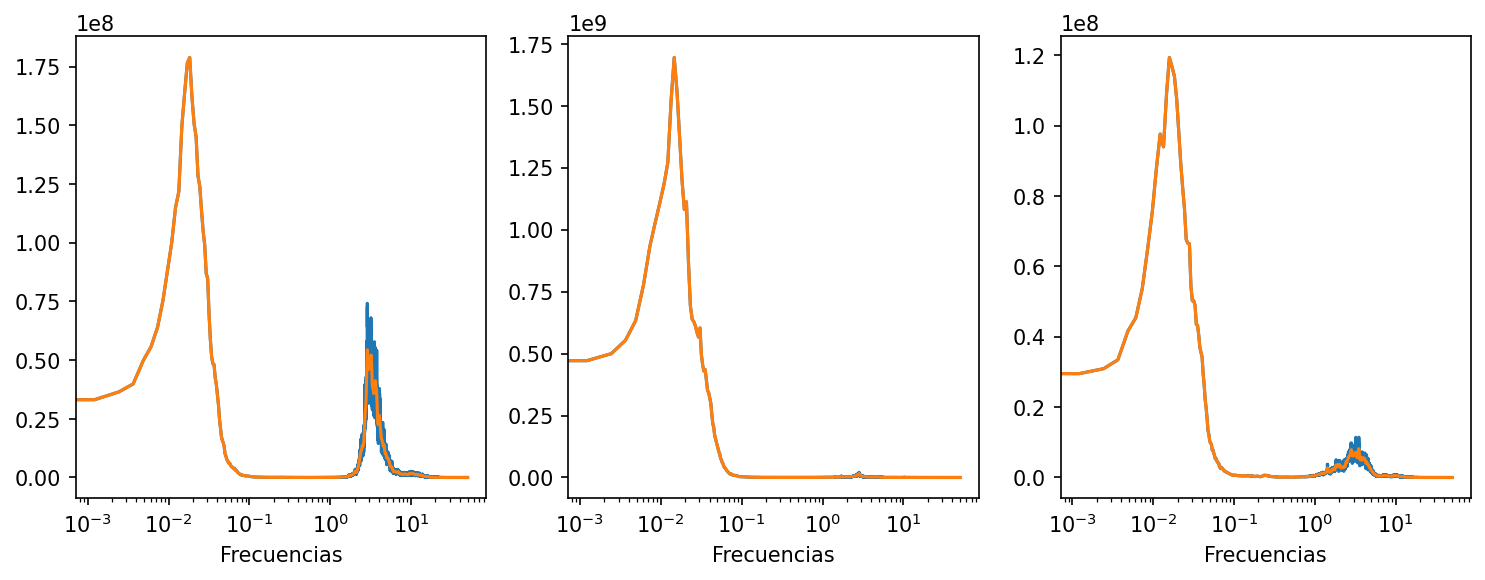

In [14]:
fig, ax = plt.subplots(1,3,figsize = (12,4), dpi = 150)
ax[0].plot(f,Pz)
ax[1].plot(f,Pn)
ax[2].plot(f,Pe)


ax[0].plot(f,ko_Pz)
ax[1].plot(f,ko_Pn)
ax[2].plot(f,ko_Pe)

for i in range(3):
    ax[i].set_xlabel('Frecuencias')
    ax[i].set_xscale('log')

### Método Nakamura

El método Nakamura se usa para identificar la frecuencia fundamental de un sitio, analizando el ruido sísmico (como el causado por tráfico o transporte público). Se enfoca en las ondas superficiales (Rayleigh), que afectan principalmente la superficie del suelo.

#### Pasos clave:
1. **Medir el ruido**: Registrar las componentes horizontales (\(H\)) y verticales (\(V\)) del ruido en la superficie (\(s\)).
2. **Calcular el cociente espectral**:

$$
SM(\omega) = \frac{H_s(\omega)}{V_s(\omega)}
$$

#### ¿Qué representa el resultado?
- El cociente \(SM(\omega)\) muestra un pico en la frecuencia fundamental del sitio.
- Este pico no siempre indica la amplificación de la onda S, ya que depende del material del suelo.

#### Ventajas y limitaciones:
- **Ventaja**: Es un método simple y económico para analizar suelos blandos.
- **Limitación**: La amplitud del pico puede no representar la amplificación real de las ondas.

El método Nakamura es útil en proyectos donde se necesita una solución rápida y económica para caracterizar sitios sísmicos.


In [15]:
HV = (np.sqrt(ko_Pn**2 + ko_Pe**2)) / ko_Pz
HV_P = (np.sqrt(ko_Pn * ko_Pe)) / ko_Pz
HV_no = (np.sqrt(Pn**2 + Pe**2)) / Pz

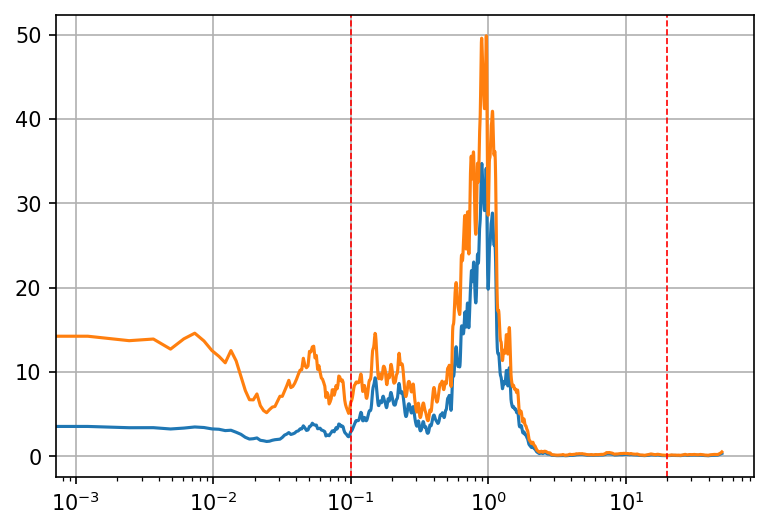

In [16]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 150)
ax.plot(f, HV)
ax.plot(f, HV)
ax.axvline(x=0.1, color='r', linestyle='--', linewidth=0.8)
ax.axvline(x=20, color='r', linestyle='--', linewidth=0.8)
ax.grid()
ax.set_xscale('log')

In [17]:
maxim = np.argmax(HV)
f0 = f[maxim]

## La frecuencia fundamental del sitio

La **frecuencia fundamental** de un sitio se refiere al valor más bajo de frecuencia a la que un sistema o estructura vibra naturalmente cuando es excitado. En el contexto de la ingeniería civil o la geofísica, esta frecuencia fundamental está asociada con las vibraciones del suelo o de una estructura debido a eventos naturales como terremotos.

### Explicación:

1. **Frecuencia Fundamental**: 
    - Es la primera frecuencia de resonancia en la que un sistema vibratorio responde con la mayor amplitud.
    - En el caso del suelo, se refiere a la frecuencia a la que el terreno vibra naturalmente debido a sus propiedades físicas, como la densidad y elasticidad del suelo.

2. **Importancia en la Ingeniería**: 
    - Conocer la frecuencia fundamental es crucial para diseñar estructuras que puedan soportar eventos sísmicos, evitando que entren en resonancia con las vibraciones del suelo.
    - La resonancia ocurre cuando la frecuencia de un terremoto coincide con la frecuencia fundamental del sitio, lo que puede amplificar las vibraciones y causar daños severos a las estructuras.

In [18]:
print("RESULTADOS 💻\n"
    "Frecuencia fundamental del sitio: {}[Hz]".format(round(f0,2)))

RESULTADOS 💻
Frecuencia fundamental del sitio: 0.97[Hz]


In [19]:
maxim2 = np.argmax(HV_no)
f01 = f[maxim2]
f01

0.9753718605218238

In [ ]:
df0 = abs(f0-f01)
nor = (df0 * 100)/f0
print(f'la diferncia entre los valore es: {df0} [Hz]\n Es decir, un {nor}%')